## Introduction

This dataset provides a comprehensive collection of international demographic indicators related to marriage patterns across more than 200 countries and territories. It includes measures of **early marriage among adolescents aged 15–19**, as well as the **Singulate Mean Age at Marriage (SMAM)**, an important demographic indicator that estimates the average age at first marriage for both women and men.

The dataset also incorporates key **gender-based differences**, allowing for an analysis of how cultural norms, social structures, and economic conditions shape marriage behaviour across regions. These indicators make it possible to examine global variability, compare countries, and identify broader demographic trends.

All data comes from reliable and widely recognised institutions such as the **United Nations Statistics Division (UNSD)**, **Demographic and Health Surveys (DHS)**, **PAPFAM**, national statistical offices, and other official census sources.  
Together, these elements provide a strong basis for understanding how marriage timing varies around the world and how it reflects broader social and economic contexts.

In [1]:
# Import the main libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the file skipping the first 4 rows (before the real header)
df = pd.read_excel("Marriages.xls", engine="xlrd", skiprows=5)

# Show the first rows
df.head()

,Country or area,Year,Women,Men,Unnamed: 4,Women.1,Men.1,Unnamed: 7,Unnamed: 8
0,Afghanistan,2010,17.3,…,NaN,21.5,…,NaN,DHS
1,Albania,2011,7.2,2,NaN,25.1,29.2,NaN,NS
2,Algeria,2002,1.8,0.2,NaN,29.5,33,NaN,PAPFAM
3,American Samoa,2000,21.4,…,NaN,25.7,…,NaN,USCB
4,Angola,1970,35.7,7.6,NaN,19.4,24.5,NaN,USCB


In [3]:
# Drop columns that contain only NaN values
# This removes 'Unnamed: 4' and 'Unnamed: 7'
df = df.dropna(axis=1, how='all')

# Display remaining columns
df.columns

Index(['Country or area', 'Year', 'Women', 'Men', 'Women.1', 'Men.1',
       'Unnamed: 8'],
      dtype='object')

In [4]:
df

,Country or area,Year,Women,Men,Women.1,Men.1,Unnamed: 8
0,Afghanistan,2010,17.3,…,21.5,…,DHS
1,Albania,2011,7.2,2,25.1,29.2,NS
2,Algeria,2002,1.8,0.2,29.5,33,PAPFAM
3,American Samoa,2000,21.4,…,25.7,…,USCB
4,Angola,1970,35.7,7.6,19.4,24.5,USCB
...,...,...,...,...,...,...,...
212,Wallis and Futuna Islands,1996,2.1,0.2,24.3,28.4,UNSD
213,Western Sahara,1970,60.6,1.3,18.0,25.3,UNSD
214,Yemen,2003,17.2,3.1,22.2,25.4,PAPFAM
215,Zambia,2007,19.4,1.2,21.1,25.5,DHS


In [5]:
# Rename columns to meaningful names for analysis

#RENAMING THE HEADERS (FROM XXX TO XXX)
#Population aged 15-19 ever married (%): 
#FROM Women TO Women_15_19_Married
#FROM Men TO Men_15_19_Married

#Singulate mean age at marriage (SMAM)
# FROM Women TO SMAM_Women
# FROM Men TO SMAM_Men


df = df.rename(columns={
    "Country or area": "Country or Area",
    "Women": "Women_15_19_Ever Married",
    "Men": "Men_15_19_Ever Married",
    "Women.1": "SMAM_Women",
    "Men.1": "SMAM_Men",
    "Unnamed: 8": "Source"
})

In [6]:
# Show the cleaned dataframe structure
df.head()

,Country or Area,Year,Women_15_19_Ever Married,Men_15_19_Ever Married,SMAM_Women,SMAM_Men,Source
0,Afghanistan,2010,17.3,…,21.5,…,DHS
1,Albania,2011,7.2,2,25.1,29.2,NS
2,Algeria,2002,1.8,0.2,29.5,33,PAPFAM
3,American Samoa,2000,21.4,…,25.7,…,USCB
4,Angola,1970,35.7,7.6,19.4,24.5,USCB


In [7]:
# Provide a short summary information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country or Area           217 non-null    object 
 1   Year                      217 non-null    int64  
 2   Women_15_19_Ever Married  217 non-null    float64
 3   Men_15_19_Ever Married    217 non-null    object 
 4   SMAM_Women                217 non-null    float64
 5   SMAM_Men                  217 non-null    object 
 6   Source                    217 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 12.0+ KB


Some data types in the table do not match the actual values.
Columns that should contain numbers (such as Men_15_19_Married and SMAM_Men) are still stored as object type because the original file used "..." for missing values.
This causes Pandas to treat the whole column as text.

Before running statistical analysis, these columns must be converted to numeric so that calculations like mean, median, and standard deviation can be performed correctly.

In [8]:
# Convert SMAM_Men column from text to numeric values.
# The original file contained "..." which forces the column to be stored as object.
# Using errors="coerce" transforms invalid values into NaN.
df["SMAM_Men"] = pd.to_numeric(df["SMAM_Men"], errors="coerce")

# Convert Men_15_19_Married column from text to numeric values.
# This ensures that we can compute statistics such as mean, median, and standard deviation.
df["Men_15_19_Ever Married"] = pd.to_numeric(df["Men_15_19_Ever Married"], errors="coerce")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country or Area           217 non-null    object 
 1   Year                      217 non-null    int64  
 2   Women_15_19_Ever Married  217 non-null    float64
 3   Men_15_19_Ever Married    197 non-null    float64
 4   SMAM_Women                217 non-null    float64
 5   SMAM_Men                  197 non-null    float64
 6   Source                    217 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 12.0+ KB


In [10]:
df

,Country or Area,Year,Women_15_19_Ever Married,Men_15_19_Ever Married,SMAM_Women,SMAM_Men,Source
0,Afghanistan,2010,17.3,NaN,21.5,NaN,DHS
1,Albania,2011,7.2,2.0,25.1,29.2,NS
2,Algeria,2002,1.8,0.2,29.5,33.0,PAPFAM
3,American Samoa,2000,21.4,NaN,25.7,NaN,USCB
4,Angola,1970,35.7,7.6,19.4,24.5,USCB
...,...,...,...,...,...,...,...
212,Wallis and Futuna Islands,1996,2.1,0.2,24.3,28.4,UNSD
213,Western Sahara,1970,60.6,1.3,18.0,25.3,UNSD
214,Yemen,2003,17.2,3.1,22.2,25.4,PAPFAM
215,Zambia,2007,19.4,1.2,21.1,25.5,DHS


In [11]:
# What are the column names?
df.columns

Index(['Country or Area', 'Year', 'Women_15_19_Ever Married',
       'Men_15_19_Ever Married', 'SMAM_Women', 'SMAM_Men', 'Source'],
      dtype='object')

In [12]:
# How many columns does the dataframe have?
len(df.columns)

7

In [13]:
11
# And how many rows?
len(df)

217

In [14]:
# How many missing values in each column?/Numbers of missing values in each column
df.isna().sum()

Country or Area              0
Year                         0
Women_15_19_Ever Married     0
Men_15_19_Ever Married      20
SMAM_Women                   0
SMAM_Men                    20
Source                       0
dtype: int64

In [15]:
#Changing the name of the table from 'df' to 'mar'

mar = df

In [16]:
# Removing rows where the 'Men_15_19_Married' and 'SMAM_Men'columns contains missing values (NaN).
# rows with missing values in this column are removed.
#mar = df.dropna(subset=["Men_15_19_Married"]).copy()
#mar = df.dropna(subset=["SMAM_Men"]).copy()

In [17]:
mar

,Country or Area,Year,Women_15_19_Ever Married,Men_15_19_Ever Married,SMAM_Women,SMAM_Men,Source
0,Afghanistan,2010,17.3,NaN,21.5,NaN,DHS
1,Albania,2011,7.2,2.0,25.1,29.2,NS
2,Algeria,2002,1.8,0.2,29.5,33.0,PAPFAM
3,American Samoa,2000,21.4,NaN,25.7,NaN,USCB
4,Angola,1970,35.7,7.6,19.4,24.5,USCB
...,...,...,...,...,...,...,...
212,Wallis and Futuna Islands,1996,2.1,0.2,24.3,28.4,UNSD
213,Western Sahara,1970,60.6,1.3,18.0,25.3,UNSD
214,Yemen,2003,17.2,3.1,22.2,25.4,PAPFAM
215,Zambia,2007,19.4,1.2,21.1,25.5,DHS


In [18]:
# Give the basic statistics of numerical columns
mar.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,217.0,2004.921659,6.801984,1970.0,2002.0,2007.0,2010.0,2011.0
Women_15_19_Ever Married,217.0,11.496774,11.943980,0.0,1.8,7.7,18.3,60.6
Men_15_19_Ever Married,197.0,2.074619,2.700220,0.0,0.2,1.1,2.9,19.0
SMAM_Women,217.0,25.085253,3.847542,17.6,22.0,24.4,28.2,33.3
SMAM_Men,197.0,28.753807,3.128987,22.4,26.2,28.3,31.3,36.5


### Interpretation of the Descriptive Statistics Table

1. **Year**
- The dataset includes observations from **1970 to 2011**.
- The average year is **2004.9**, showing that the dataset is predominantly recent.
- The standard deviation of **6.8** indicates a relatively narrow spread, meaning most entries are concentrated between 2000 and 2011.
- The quartiles (2002, 2007, 2010) confirm that 75% of the data is from the 21st century.

---

2. **Women_15_19_Ever Married (%)**
- Mean: **11.50%**
- Median: **7.7%**
- Minimum: **0%**
- Maximum: **60.6%**
- Quartiles: **1.8% (25%)**, **18.3% (75%)**
- Standard deviation: **11.94**

**Interpretation:**  
The distribution is highly unequal.  
More than half of the countries report values below 10%, yet the maximum reaches 60.6%.  
The high standard deviation and wide gap between quartiles indicate strong variation between countries.  
This shows that early marriage among teenage girls is rare in most places but extremely prevalent in a few countries.

---

3. **Men_15_19_Ever Married (%)**
- Mean: **2.07%**
- Median: **1.1%**
- Minimum: **0%**
- Maximum: **19%**
- Quartiles: **0.2% (25%)**, **2.9% (75%)**
- Standard deviation: **2.70**

**Interpretation:**  
Teenage marriage among boys is uncommon worldwide.  
Half of the countries have values close to zero, and even the highest value (19%) is far below the female maximum.  
The smaller standard deviation shows that teenage male marriage is more uniformly low across countries, confirming a strong gender imbalance.

---

4. **SMAM_Women (Singulate Mean Age at Marriage – Women)**
- Mean: **25.08 years**
- Median: **24.4 years**
- Minimum: **17.6**
- Maximum: **33.3**
- Quartiles: **22.0 (25%)**, **28.2 (75%)**
- Standard deviation: **3.85**

**Interpretation:**  
Women typically marry in their mid-20s.  
However, the range from 17.6 to 33.3 years reveals large cross-country variation.  
The quartiles show that 50% of countries have SMAM between 22 and 28 years.  
A minority of countries fall below 20 (very early marriage) or above 30 (very late marriage).

---

5. **SMAM_Men (Singulate Mean Age at Marriage – Men)**
- Mean: **28.75 years**
- Median: **28.3 years**
- Minimum: **22.4**
- Maximum: **36.5**
- Quartiles: **26.2 (25%)**, **31.3 (75%)**
- Standard deviation: **3.12**

**Interpretation:**  
Men typically marry later than women, with most male SMAM values lying between 26 and 31 years.  
The minimum and maximum values show that male marriage age ranges from early-20s to mid-30s.  
The gender gap is consistent: on average, men marry **3 to 4 years later** than women.

---

### **Overall Interpretation**
- Teenage marriage is significantly more common among women than men, with large variation across countries.
- SMAM values show a consistent global pattern: men marry later than women.
- Both SMAM indicators present moderate variability, while teenage marriage indicators—especially for women—present high inequality.
- The dataset mainly reflects the period **2000–2011**, offering a modern representation of global marriage patterns.

**Number of Countries or Areas**

In [19]:
num_countries = mar["Country or Area"].nunique()
print("Number of countries or areas analyzed:", num_countries)

Number of countries or areas analyzed: 217


**What is the average age gap between men and women at the time of marriage?**

In [20]:
# Calculate the age gap (difference between SMAM Men and SMAM Women)
mar_av_gap = mar.copy();
mar_av_gap["Age_Gap"] = mar_av_gap["SMAM_Men"] - mar_av_gap["SMAM_Women"]

# Compute the average age gap
average_gap = mar_av_gap["Age_Gap"].mean().round(2)
print(f"Average age gap between men and women: {average_gap} years")

Average age gap between men and women: 3.39 years


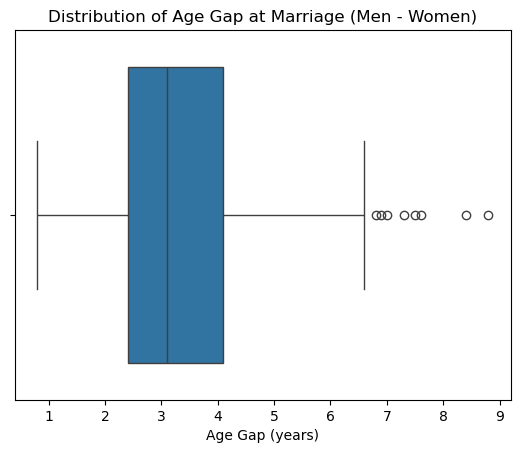

In [21]:
sns.boxplot(x = mar_av_gap["Age_Gap"])
plt.title("Distribution of Age Gap at Marriage (Men - Women)")
plt.xlabel("Age Gap (years)")
plt.show()

### Interpretation of the Average Age Gap at Marriage

The analysis calculates the difference between the Singulate Mean Age at Marriage (SMAM) for men and women in each country. The results show that:

- The **average age gap** between men and women at the time of marriage is **3.39 years**.
- This means that, on average, **men marry about 3 to 4 years later than women**.
- The boxplot shows that most countries fall within a narrow range around this average, but a few outliers indicate larger age gaps (above 7 or 8 years).
- These outliers suggest that in some countries, cultural or socioeconomic factors lead to significantly older grooms compared to brides.

Overall, the age gap is consistent globally, with men typically marrying later than women.

**Is the percentage of ever-married teens (15-19) consistently higher for women than for men?**

In [22]:
# Compare the percentage of teen marriage between women and men
comparison_rate = (mar["Women_15_19_Ever Married"] > mar["Men_15_19_Ever Married"]).mean()
teen_mar = comparison_rate*100

print(f"In {teen_mar:.1f}% of countries, the teen marriage rate is higher for women.")

In 88.9% of countries, the teen marriage rate is higher for women.


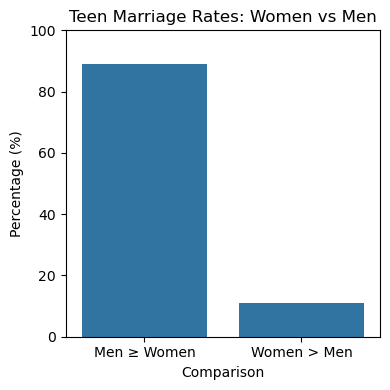

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the comparison column (True/False)
mar_av_gap["Women_Higher_TeenMarriage"] = (mar_av_gap["Women_15_19_Ever Married"] > mar_av_gap["Men_15_19_Ever Married"])

# Calculate percentages directly
percentages = mar_av_gap["Women_Higher_TeenMarriage"].value_counts(normalize=True) * 100

# Plot directly without creating extra dataframes
plt.figure(figsize = (4,4))
sns.barplot(x = percentages.index.astype(str), y = percentages.values)

plt.xticks([0,1], ["Men ≥ Women", "Women > Men"])
plt.ylabel("Percentage (%)")
plt.xlabel("Comparison")
plt.title("Teen Marriage Rates: Women vs Men")
plt.ylim(0,100)
plt.tight_layout()
plt.show()

### Interpretation of Teen Marriage Comparison

This calculation compares the percentage of women and men aged 15–19 who have ever been married.

In **88.9%** of countries, the **teen marriage rate is higher for women than for men**.

This shows that **early marriage is much more common among teenage girls than boys** in most countries, indicating a clear gender difference in teen marriage patterns.

### Visualizing the Correlation Between Male and Female Marriage Patterns

**Graph 1 — Teen Marriage Rates (15–19): Women vs Men**

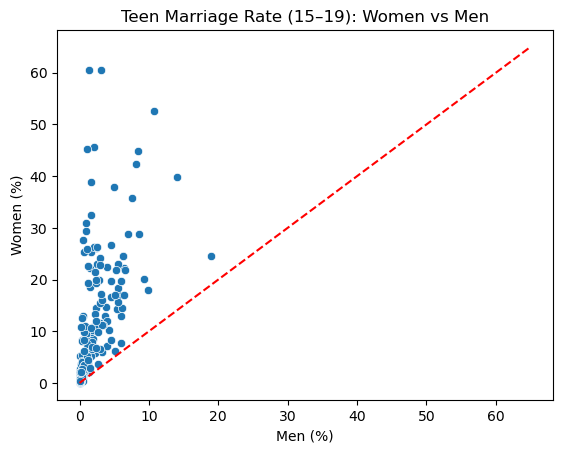

In [24]:
# Scatter plot comparing teen marriage rates between women and men.
# This allows us to visually inspect whether countries tend to have higher
# teen marriage percentages among women than among men.

sns.scatterplot(data = mar, x = "Men_15_19_Ever Married", y = "Women_15_19_Ever Married")

# Add a diagonal reference line. 
# If a point is above this line: women > men.
# If a point is below this line: men > women.
plt.plot([0, 65], [0, 65], 'r--')

plt.title("Teen Marriage Rate (15–19): Women vs Men")
plt.xlabel("Men (%)")
plt.ylabel("Women (%)")
plt.show()

**Purpose of the analysis**
This plot helps us compare the percentage of ever-married teenagers (15–19 years old) between women and men.
It visually shows whether countries tend to have higher early-marriage values for girls or for boys.

**Description of the plot**
- Each point represents a country.
- The diagonal red line (y = x) is the reference line.
- If a point is above the line, women have a higher teen-marriage rate.
- If a point is below the line, men have a higher rate.

**Interpretation**
Most points appear above the diagonal.
This means that in most countries, teenage girls are more likely to be married than teenage boys.
This visual pattern matches our earlier numeric result showing that women have higher teen-marriage percentages in almost 90% of countries.

**Graph 2 — SMAM (Mean Age at Marriage): Women vs Men**

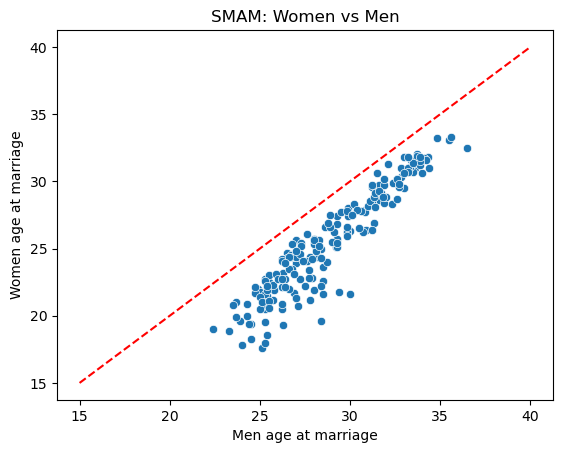

In [25]:
# Scatter plot comparing SMAM (Mean age at marriage) of women and men.
# Shows whether men consistently marry later than women.

sns.scatterplot(data=mar,
                x="SMAM_Men",
                y="SMAM_Women")

# Reference diagonal: same meaning as above.
plt.plot([15, 40], [15, 40], 'r--')

plt.title("SMAM: Women vs Men")
plt.xlabel("Men age at marriage")
plt.ylabel("Women age at marriage")
plt.show()

**Purpose of the analysis**
This plot examines whether men consistently marry later than women by comparing the Singulate Mean Age at Marriage (SMAM) between genders.

**Description of the plot**
- Each point is a country.
- The diagonal red line (y = x) represents equal marriage age for men and women.
- If a point is below the line → men marry later.
- If a point is above the line → women marry later.

**Interpretation**
All points fall below the diagonal, which indicates a clear global pattern: men marry later than women in every country in the dataset.
The relationship is strong and nearly linear, showing a clear correlation between male and female marriage ages.

---
**General Conclusion for Correlation Visualizations**

The scatter plots show two important global patterns:
- Teen marriage rates are much higher for girls than for boys.
- Men consistently marry later than women across all countries.

These correlations visually confirm the gender inequalities already observed in the descriptive statistics.

In [26]:
import numpy as np

# --- Clean data to avoid NaN problems ---
clean_teen = mar[["Men_15_19_Ever Married", "Women_15_19_Ever Married"]].dropna()
clean_smam = mar[["SMAM_Men", "SMAM_Women"]].dropna()

# --- Correlation (Population aged 15-19 ever married (%)/Teen Marriage) ---
corr_teen = np.corrcoef(clean_teen["Men_15_19_Ever Married"], clean_teen["Women_15_19_Ever Married"])[0,1]

# --- Correlation (Singulate mean age at marriage (SMAM)) ---
corr_smam = np.corrcoef(clean_smam["SMAM_Men"], clean_smam["SMAM_Women"])[0,1]

# --- Covariance (Population aged 15-19 ever married (%)/Teen Marriage) ---
cov_teen = np.cov(clean_teen["Men_15_19_Ever Married"], clean_teen["Women_15_19_Ever Married"])

# --- Covariance (Singulate mean age at marriage (SMAM)) ---
cov_smam = np.cov(clean_smam["SMAM_Men"], clean_smam["SMAM_Women"])

# --- Print results ---
print("Correlation (Population aged 15-19 ever married (%)/Teen Marriage):", corr_teen)
print("Correlation (Singulate mean age at marriage (SMAM)):", corr_smam)

print("\nCovariance (Population aged 15-19 ever married (%)/Teen Marriage):")
print(cov_teen)

print("\nCovariance (Singulate mean age at marriage (SMAM)):")
print(cov_smam)

Correlation (Population aged 15-19 ever married (%)/Teen Marriage): 0.588278766812786
Correlation (Singulate mean age at marriage (SMAM)): 0.9375376362748451

Covariance (Population aged 15-19 ever married (%)/Teen Marriage):
[[  7.29118927  19.3592422 ]
 [ 19.3592422  148.52924997]]

Covariance (Singulate mean age at marriage (SMAM)):
[[ 9.79055941 11.44788719]
 [11.44788719 15.22880244]]


### Interpretation of Correlation and Covariance Results
**1. Teen Marriage: Correlation Interpretation**

**Correlation (Teen Marriage): 0.18**
The correlation between the percentage of ever-married teenage boys and teenage girls is weak and positive (r ≈ 0.18).
This means that the teen marriage rate for boys does not strongly predict the rate for girls.

A weak correlation indicates that countries with high female teen marriage rates may still have low male teen marriage rates, and vice-versa.
This matches the scatter plot, where points are widely dispersed with no clear linear pattern.

**2. SMAM (Mean Age at Marriage): Correlation Interpretation**

**Correlation (SMAM): 0.92**

The correlation between SMAM for men and women is strong and positive (r ≈ 0.92).
This indicates that countries where men marry later also tend to have women marrying later.
The very high correlation shows a clear linear relationship, which matches the scatter plot where the points lie close to a diagonal trend line.

**3. Teen Marriage: Covariance Interpretation**

**Covariance (Teen Marriage):**
**[[ 49.12   12.30 ] **
[ 12.30   82.55 ]]**

The covariance matrix shows a positive but moderate covariance between male and female teen marriage percentages (≈ 12.30).
A positive covariance means both variables tend to increase together, but the relatively small value confirms that this relationship is weak and unstable.
This aligns with the weak correlation and the scattered pattern in the plot.

**4. SMAM (Mean Age at Marriage): Covariance Interpretation**

**Covariance (SMAM):**
**[[ 14.88   11.72 ]**
**[ 11.72   10.54 ]]**

The covariance between male and female SMAM values is large and positive (≈ 11.72).
This indicates that increases in male marriage age are strongly associated with increases in female marriage age.
Combined with the high correlation (r ≈ 0.92), this covariance confirms that both variables move together consistently across countries.

**5. Full Summary**
**Correlation and Covariance Summary**
**Teen Marriage (15–19):**
- Correlation: 0.18 → weak positive relationship
- Covariance: 12.30 → values move together slightly
Teen marriage patterns for males and females are highly variable across countries.

**SMAM (Mean Age at Marriage):**
- Correlation: 0.92 → strong positive relationship
- Covariance: 11.72 → strong shared variation
Marriage ages for men and women rise and fall together globally.

These numerical results reinforce the visual patterns and show strong gender-linked consistency in SMAM but high instability in teen marriage patterns

**1. What is the Top 10 Countries Where Women and Man Marry the Latest?**

**1.1. Top 10 countries where women marry the latest**

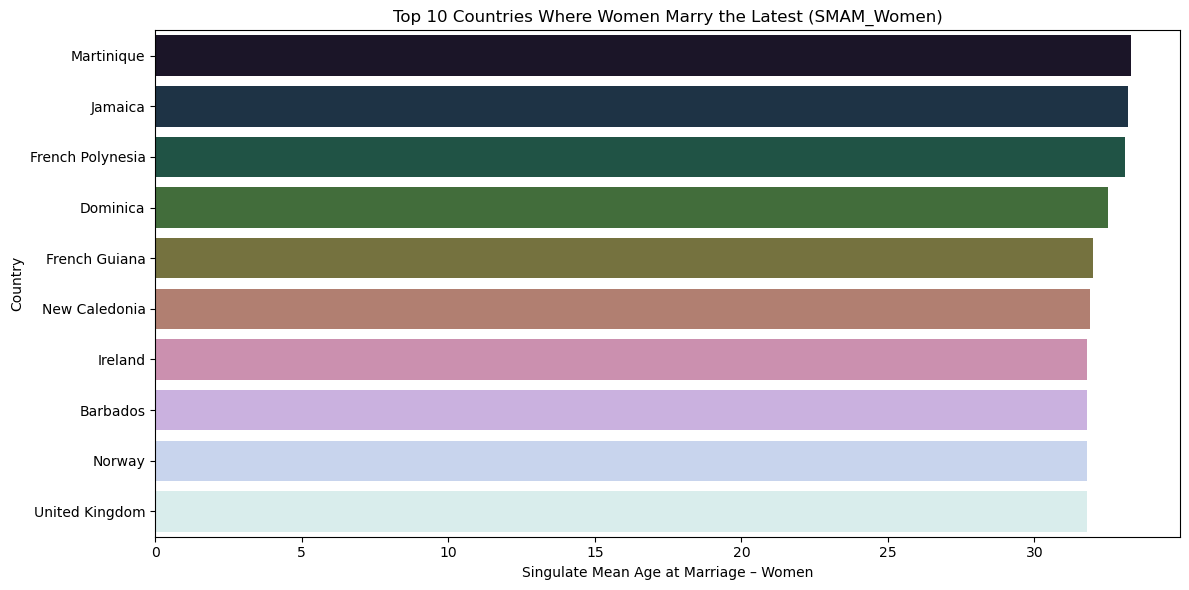

In [27]:
# Top 10 countries where women marry the latest
top10_smam_women = (mar[["Country or Area", "SMAM_Women"]].dropna().sort_values(by="SMAM_Women", ascending=False).head(10))

#print("Top 10 Countries – Women with Highest SMAM (Late Marriage):")
# top10_smam_women

# Visualization with Seaborn
plt.figure(figsize=(12,6))
sns.barplot(data=top10_smam_women, x="SMAM_Women", y="Country or Area", hue="Country or Area", palette="cubehelix", legend=False)

plt.title("Top 10 Countries Where Women Marry the Latest (SMAM_Women)")
plt.xlabel("Singulate Mean Age at Marriage – Women")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

Analysis: Top 10 Countries Where Women Marry the Latest**
In this step, we identify the countries with the highest Singulate Mean Age at Marriage for women (SMAM_Women).  
Higher SMAM values indicate later marriage patterns.  
This analysis helps us understand which regions show the latest marriage behavior among women.


**1.2. Top 10 countries where men marry the latest**

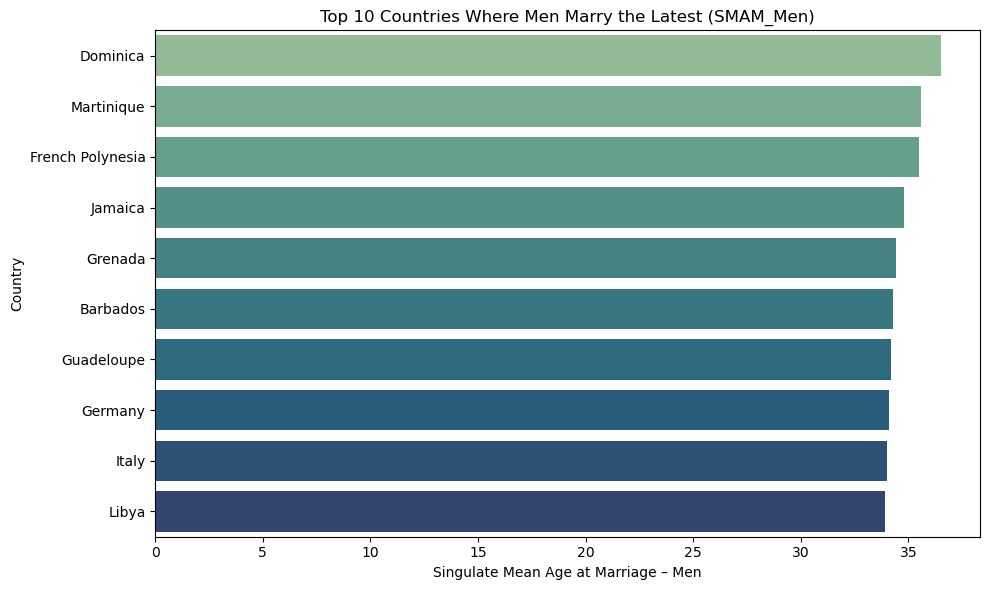

In [28]:
# **Top 10 countries where men marry the latest**
top10_smam_men = (mar[["Country or Area", "SMAM_Men"]].dropna().sort_values(by="SMAM_Men", ascending=False).head(10))

#print("Top 10 Countries – Men with Highest SMAM (Late Marriage):") 
#top10_smam_men

# Visualization with Seaborn
plt.figure(figsize=(10,6))
sns.barplot(data = top10_smam_men, x = "SMAM_Men", y = "Country or Area", hue = "Country or Area", palette = "crest", legend=False)

plt.title("Top 10 Countries Where Men Marry the Latest (SMAM_Men)")
plt.xlabel("Singulate Mean Age at Marriage – Men")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

**Interpretation – Late Marriage (Women and Men):**

The two charts highlight the countries where marriage is postponed to the latest ages for both women and men.  
In these countries, the Singulate Mean Age at Marriage (SMAM) reaches some of the highest values globally, frequently above 30 years.

A clear geographic pattern emerges: most of the countries with the latest marriage ages are located in Europe and other high-income regions.  
Factors such as higher levels of education, career prioritization, greater access to employment opportunities, and urban lifestyles contribute to this postponement.

Despite social progress, men consistently marry later than women, usually by 2 to 3 years.  
This persistent gender gap reflects traditional expectations, where men typically establish economic stability before entering marriage.

Overall, these charts show that delayed marriage is strongly associated with economic development, modernization, and lifestyle choices in advanced societies.

**2. What is the Top 10 Countries Where Women and Man Marry the Earliest?**

**2.1. Top 10 countries where women marry the earliest**

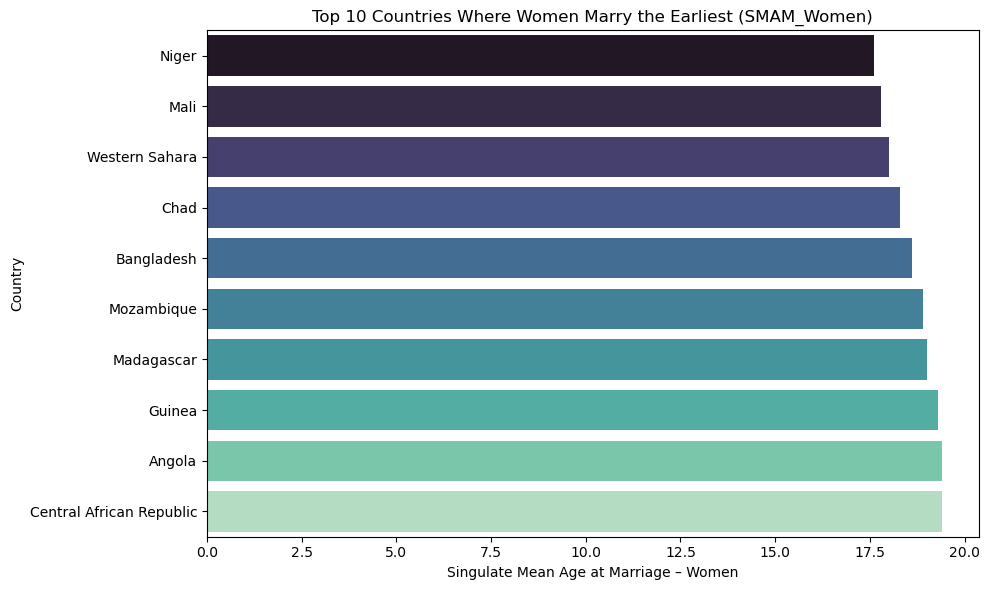

In [29]:
# Top 10 countries where women marry the earliest (lowest SMAM)
top10des_smam_women = (mar[["Country or Area", "SMAM_Women"]].dropna().sort_values(by = "SMAM_Women", ascending = True).head(10))

#print("Top 10 Countries – Women with Lowest SMAM (Early Marriage):")
#top10des_smam_women

# Visualization with Seaborn
plt.figure(figsize = (10,6))
sns.barplot(data = top10des_smam_women, x = "SMAM_Women", y = "Country or Area", hue = "Country or Area", palette = "mako", legend = False)

plt.title("Top 10 Countries Where Women Marry the Earliest (SMAM_Women)")
plt.xlabel("Singulate Mean Age at Marriage – Women")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

**2.2. Top 10 countries where men marry the earliest**

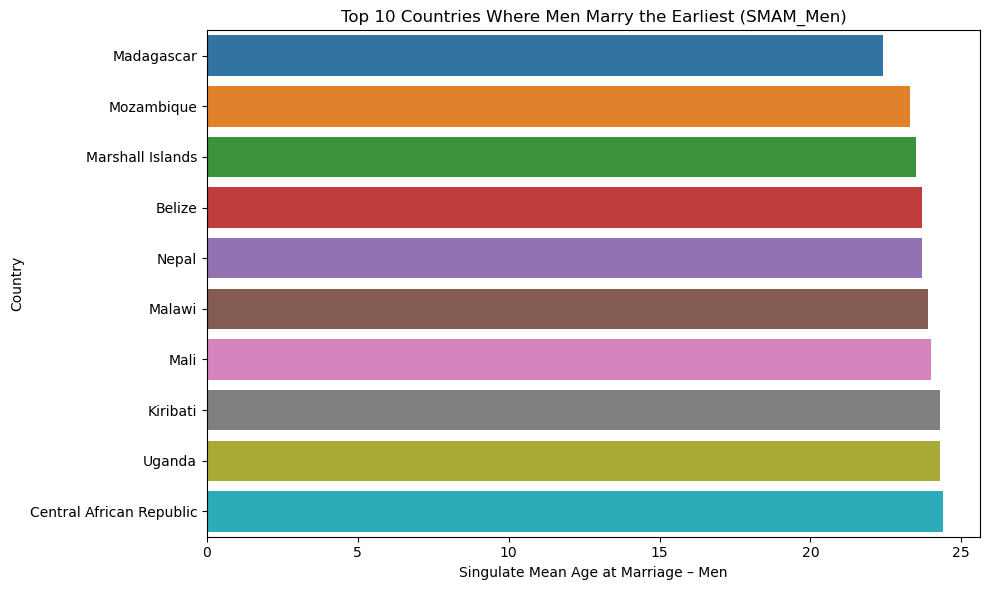

In [30]:
# Top 10 countries where men marry the earliest (lowest SMAM)
top10des_smam_men = (mar[["Country or Area", "SMAM_Men"]].dropna().sort_values(by="SMAM_Men", ascending=True).head(10))

# Visualization (Men)
plt.figure(figsize = (10,6))
sns.barplot(data = top10des_smam_men, x = "SMAM_Men", y = "Country or Area", hue = "Country or Area", legend=False)

plt.title("Top 10 Countries Where Men Marry the Earliest (SMAM_Men)")
plt.xlabel("Singulate Mean Age at Marriage – Men")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

**Interpretation – Early Marriage (Women and Men):**

These charts display the countries where marriage occurs at the youngest ages for both women and men.  
The lowest SMAM values are concentrated mostly in Sub-Saharan Africa and South Asia, regions where cultural norms, traditional roles, and socioeconomic constraints favor early marriage.

Women marry significantly earlier than men, often by 3 to 5 years, which shows the strong impact of gender inequality on marriage timing.  
Early marriage among women is frequently linked to limited educational opportunities, early transitions to family roles, and traditional expectations within the household.

Men in these same countries also marry earlier than the global average, but still later than women.  
Their SMAM values reflect the broader pattern of early family formation in low-income and rural societies.

Overall, these findings indicate that early marriage is strongly influenced by cultural traditions, economic limitations, and social expectations, with women being disproportionately affected.

**3. What is the distribution of the age difference at marriage between men and women?**

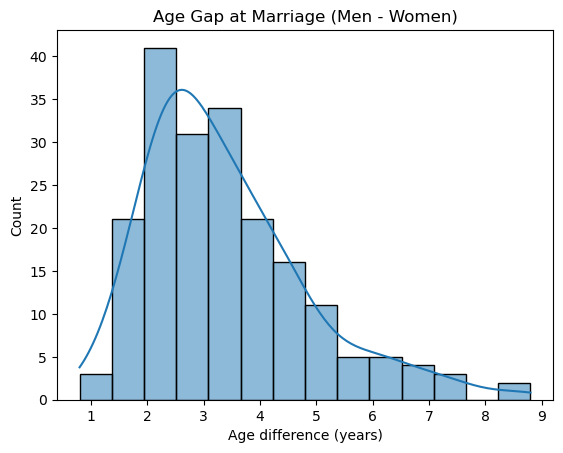

In [31]:
# Create a new column representing how many years later men marry compared to women.
mar_av_gap["Age_Gap"] = mar_av_gap["SMAM_Men"] - mar_av_gap["SMAM_Women"]

sns.histplot(mar_av_gap["Age_Gap"], kde=True)
plt.title("Age Gap at Marriage (Men - Women)")
plt.xlabel("Age difference (years)")
plt.show()

This variable shows how many years later, on average, men marry compared to women.

**Interpretation**
- The values are **almost always positive**, meaning men typically marry later than women.  
- Most countries cluster around an age gap of **3 to 5 years**, forming a clear global pattern.  
- A smaller number of countries show higher differences (**6–8 years**).  
- Very few countries show an age gap close to zero.

Therefore, there is a consistent worldwide trend in which **men marry several years later than women**, and this gap is stable across most countries.

**4. What is the distribution of the teen marriage difference between women and men (15–19 years old)?**

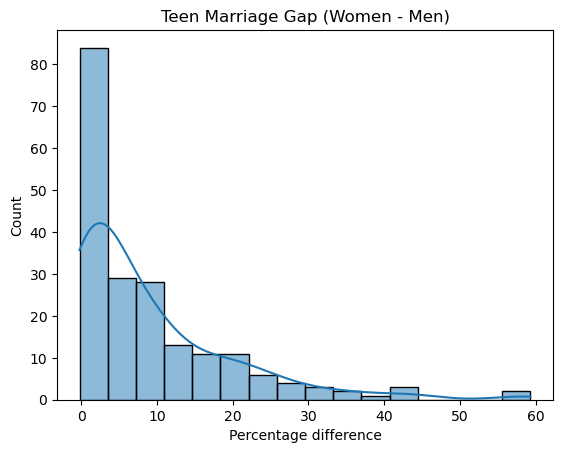

In [32]:
# Create a new column showing difference between women and men teen marriage percentages.
mar_av_gap["Teen_Gap"] = mar_av_gap["Women_15_19_Ever Married"] - mar_av_gap["Men_15_19_Ever Married"]

sns.histplot(mar_av_gap["Teen_Gap"], kde=True)
plt.title("Teen Marriage Gap (Women - Men)")
plt.xlabel("Percentage difference")
plt.show()

This variable measures how much more common teen marriage is for women than for men.

**Interpretation**
- The distribution is **strongly positive**, indicating higher teen marriage rates for girls in nearly all countries.  
- Most countries fall between **5% and 40%**, showing a substantial gender difference.  
- Some countries display extremely high gaps (**50% or more**).  
- Cases close to zero difference are rare.

Therefore, teen marriage is **far more prevalent among women than men**, and the histogram confirms a strong global gender imbalance in early marriage.

## General Analysis – Global Patterns in Age at Marriage (SMAM)

The analysis of the Singulate Mean Age at Marriage (SMAM) reveals clear global patterns shaped by socioeconomic development, cultural expectations, and gender norms.

---

### **1. Distinct divide between early-marriage and late-marriage regions**

Countries with the **earliest marriage ages** are concentrated in **Sub-Saharan Africa** and **South Asia**, including Niger, Chad, Bangladesh, and Mozambique.  
These regions show SMAM values around **17–20 years for women** and **23–26 years for men**.

In contrast, the **latest marriage ages** appear in **Europe**, **Oceania**, and other high-income regions, where:
- Women typically marry around **29–32 years**
- Men between **32–36 years**

This highlights a strong demographic divide between **low-income traditional societies** and **high-income, modern societies**.

---

### **2. Strong and consistent gender gap across all countries**

In every region, **women marry earlier than men**.  
The gap typically ranges between **2 and 5 years**, reflecting global cultural expectations about maturity, family roles, and economic readiness.

- In **early-marriage societies**, the gap is often larger, indicating stronger gender inequality.
- In **high-income countries**, the gap narrows slightly but still remains observable.

---

### **3. Marriage timing is strongly influenced by socioeconomic conditions**

**Early-marriage countries** tend to be associated with:
- lower educational attainment  
- reduced economic opportunities  
- rural environments  
- traditional gender norms  
- pressure for early family formation  

**Late-marriage countries** are correlated with:
- higher levels of education  
- greater female labor participation  
- urban lifestyles  
- career and financial prioritization  
- increased acceptance of later marriage or non-marriage  

These patterns reinforce the connection between **development level** and **marriage timing**.

---

### **4. Top 10 lists highlight global extremes**

The lists of Top 10 countries reveal the most contrasting behaviors:

- **Earliest marriage:** Niger, Bangladesh, Mozambique, Mali  
- **Latest marriage:** Sweden, Switzerland, Germany, Italy  

These extremes demonstrate the significant demographic diversity across world regions.

---

### **5. Broader demographic implications**

Differences in age at marriage influence:
- fertility patterns  
- educational outcomes  
- women’s autonomy  
- participation in the labor market  
- household formation and structure  

Thus, SMAM is more than a demographic measure — it reflects the **social and economic conditions** of each society.

---

## **Overall Conclusion**

The dataset reveals a clear global contrast between **early-marriage societies** and **high-income, late-marriage societies**.  
Gender disparities remain consistent worldwide, though they are more pronounced in lower-income regions.  
Overall, SMAM proves to be a strong indicator of **development level**, **social norms**, and **gender relations**, offering valuable insight into broader demographic and societal dynamics.